In [17]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

## Loading Data to a Pandas DataFrame

In [2]:
data_file = 'data/cscpopendata.csv'
data_df = pd.read_csv(data_file)
data_df.head(10)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,...,13463-67-7,9,Titanium dioxide,07/09/2009,08/28/2013,11/01/2010,07/09/2009,07/09/2009,NaN,1
6,7,ABSOLUTE Precision Color Powder System - All S...,310.0,5858-81-1,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
7,7,ABSOLUTE Precision Color Powder System - All S...,311.0,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
8,7,ABSOLUTE Precision Color Powder System - All S...,312.0,D&C RED 28,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
9,8,ABSOLUTE Precision Color Powder System Opaque ...,313.0,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,ABSOLUTE,59,Nail Products,60,...,13463-67-7,17903,Titanium dioxide,07/13/2009,12/30/2010,NaN,06/09/2010,06/09/2010,NaN,1


In [3]:
data_df.tail(10)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
113770,41347,DP DONUT EYESHADOW PALLET,64676.0,t - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",NANJING CHANGJIANG PETROLEUM & CHEMICAL,44,Makeup Products (non-permanent),49,...,NaN,67733,"Mineral oils, untreated and mildly treated",03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113771,41348,DP DONUT EYESHADOW PALLET,64677.0,WHITE - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",SUN CHEMICAL,44,Makeup Products (non-permanent),48,...,13463-67-7,67734,Titanium dioxide,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113772,41348,DP DONUT EYESHADOW PALLET,64677.0,WHITE - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",SUN CHEMICAL,44,Makeup Products (non-permanent),49,...,13463-67-7,67734,Titanium dioxide,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113773,41349,DP NAIL POLISH GEL LIKE 4PC,64678.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",INTERNATIONAL LACQUER,59,Nail Products,65,...,NaN,67735,Isopropyl alcohol manufacture using strong acids,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113774,41350,DP NAIL POLISH GLDRK 8PC,64679.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",INTERNATIONAL LACQUER,59,Nail Products,65,...,NaN,67736,Isopropyl alcohol manufacture using strong acids,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113775,41351,DP NAIL POLISH ART KIT 18PC,64680.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",INTERNATIONAL LACQUER,59,Nail Products,65,...,NaN,67737,Isopropyl alcohol manufacture using strong acids,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113776,41352,DP NAIL POLISH 4PC METALLIC,64681.0,TRANSPARENT - N - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",INTERNATIONAL LACQUER,59,Nail Products,65,...,NaN,67738,Isopropyl alcohol manufacture using strong acids,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113777,41353,DP EYESHADOW 44 SHADE CUBE,64682.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",NANJING CHANGJIANG PETROLEUM & CHEMICAL,44,Makeup Products (non-permanent),48,...,NaN,67739,"Mineral oils, untreated and mildly treated",03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113778,41354,DP EYESHADOW PURSE,64683.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",NANJING CHANGJIANG PETROLEUM & CHEMICAL,44,Makeup Products (non-permanent),48,...,NaN,67740,"Mineral oils, untreated and mildly treated",03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113779,41355,DP NAIL POLISH GEL LIKE 4PC,64684.0,WHITE - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",SUN CHEMICAL,59,Nail Products,65,...,13463-67-7,67741,Titanium dioxide,04/01/2020,04/01/2020,NaN,04/01/2020,04/01/2020,NaN,1


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113780 entries, 0 to 113779
Data columns (total 22 columns):
CDPHId                    113780 non-null int64
ProductName               113780 non-null object
CSFId                     79917 non-null float64
CSF                       79493 non-null object
CompanyId                 113780 non-null int64
CompanyName               113780 non-null object
BrandName                 113568 non-null object
PrimaryCategoryId         113780 non-null int64
PrimaryCategory           113780 non-null object
SubCategoryId             113780 non-null int64
SubCategory               113780 non-null object
CasId                     113780 non-null int64
CasNumber                 107464 non-null object
ChemicalId                113780 non-null int64
ChemicalName              113780 non-null object
InitialDateReported       113780 non-null object
MostRecentDateReported    113780 non-null object
DiscontinuedDate          12906 non-null object
ChemicalCreated

## Null Values

In [6]:
print('Columns with null values:')
null_count = data_df.isna().sum()
null_count_df = null_count[null_count > 0].to_frame().reset_index().sort_values(0, ascending=False)
null_count_df.rename(columns={'index': 'Column', 0: 'Number of Null Values'})

Columns with null values:


,Column,Number of Null Values
5,ChemicalDateRemoved,110848
4,DiscontinuedDate,100874
1,CSF,34287
0,CSFId,33863
3,CasNumber,6316
2,BrandName,212


## Unique Values per Column

In [9]:
print('Number of Unique Values per Column:')
num_unique_df = data_df.nunique(axis=0).to_frame().reset_index()
num_unique_df.sort_values(0, ascending=False).rename(columns={'index': 'Column', 0: 'Number of Unique Values'})

Number of Unique Values per Column:


,Column,Number of Unique Values
2,CSFId,57841
13,ChemicalId,57737
0,CDPHId,36794
3,CSF,34195
1,ProductName,33565
6,BrandName,2705
19,ChemicalUpdatedAt,2283
18,ChemicalCreatedAt,2277
15,InitialDateReported,2232
16,MostRecentDateReported,2134


In [10]:
# Change after actually cleaning
clean_data_df = data_df

# EDA

(array([76696., 15328.,   756.,  4939.,  3444.,  8305.,  1477.,  2057.,
          507.,   271.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

Text(0.5, 0, 'Cosmetics Category')

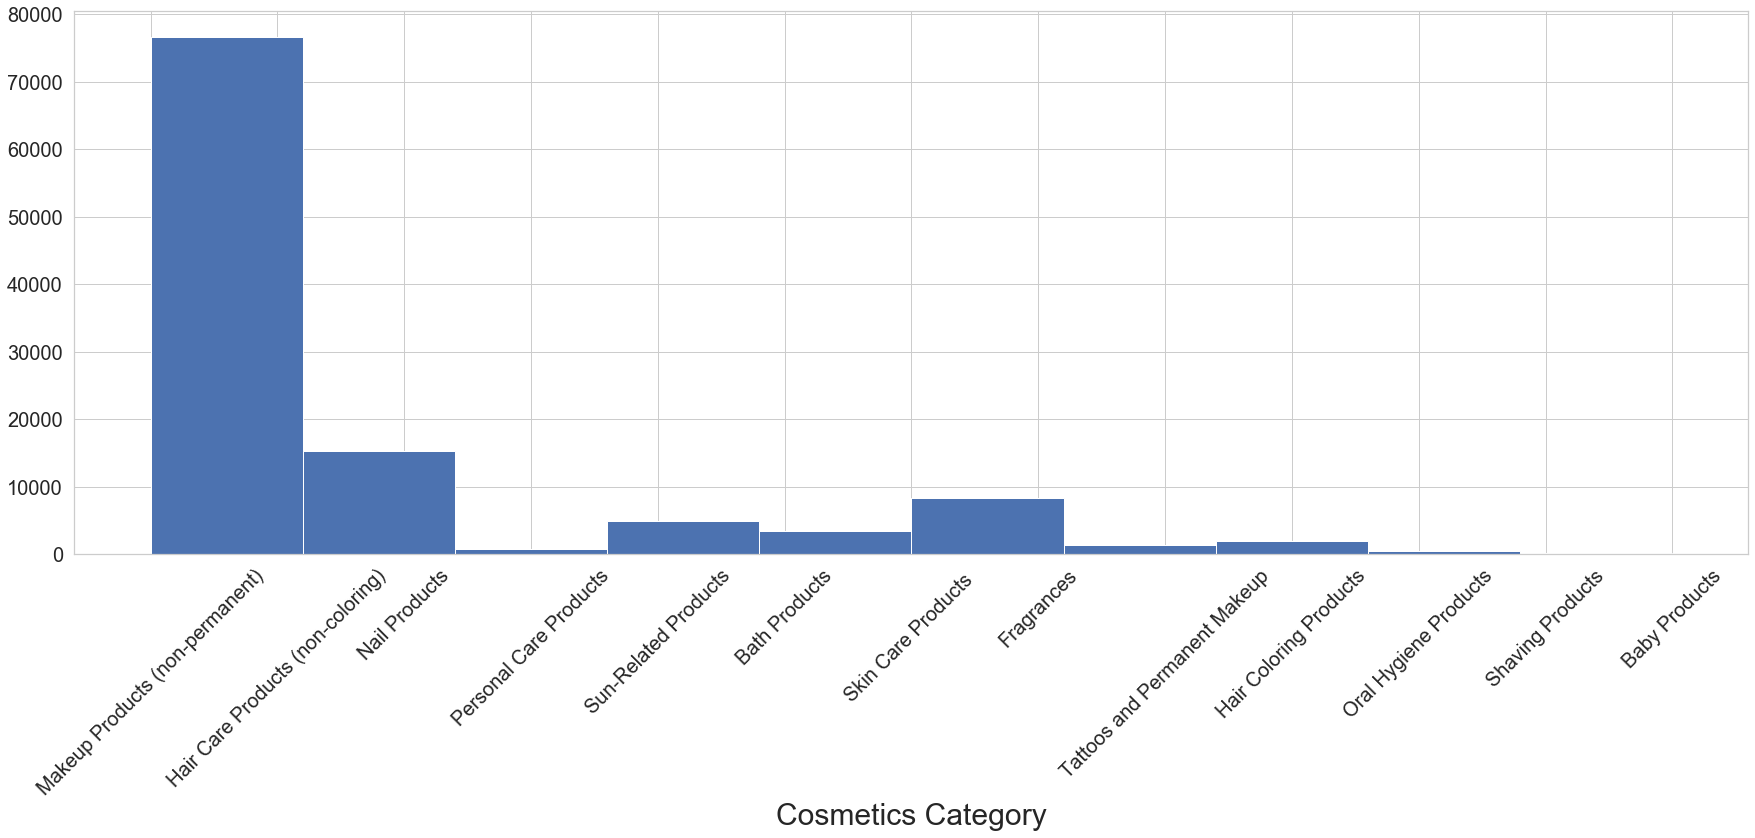

In [44]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.hist(clean_data_df['PrimaryCategory'])
plt.xticks(rotation='45')
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.set_xlabel('Cosmetics Category', size=30)
# plt.rc('xtick', labelsize=25)
# plt.rc('ytick', labelsize=25)
plt.show()

In [20]:
clean_data_df['PrimaryCategory'].value_counts()

Makeup Products (non-permanent)      75081
Nail Products                        15328
Skin Care Products                    7661
Sun-Related Products                  4939
Bath Products                         3444
Hair Coloring Products                2057
Hair Care Products (non-coloring)     1615
Tattoos and Permanent Makeup          1477
Personal Care Products                 756
Fragrances                             644
Oral Hygiene Products                  507
Shaving Products                       222
Baby Products                           49
Name: PrimaryCategory, dtype: int64

In [25]:
idxes = clean_data_df[clean_data_df['PrimaryCategory']=='Makeup Products (non-permanent)'].index

In [26]:
no_makeup_df = clean_data_df.drop(idxes)

(array([16943.,   756.,  4939.,  3444.,  7661.,   644.,  1477.,  2057.,
          507.,   271.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

Text(0.5, 0, 'Cosmetics Category')

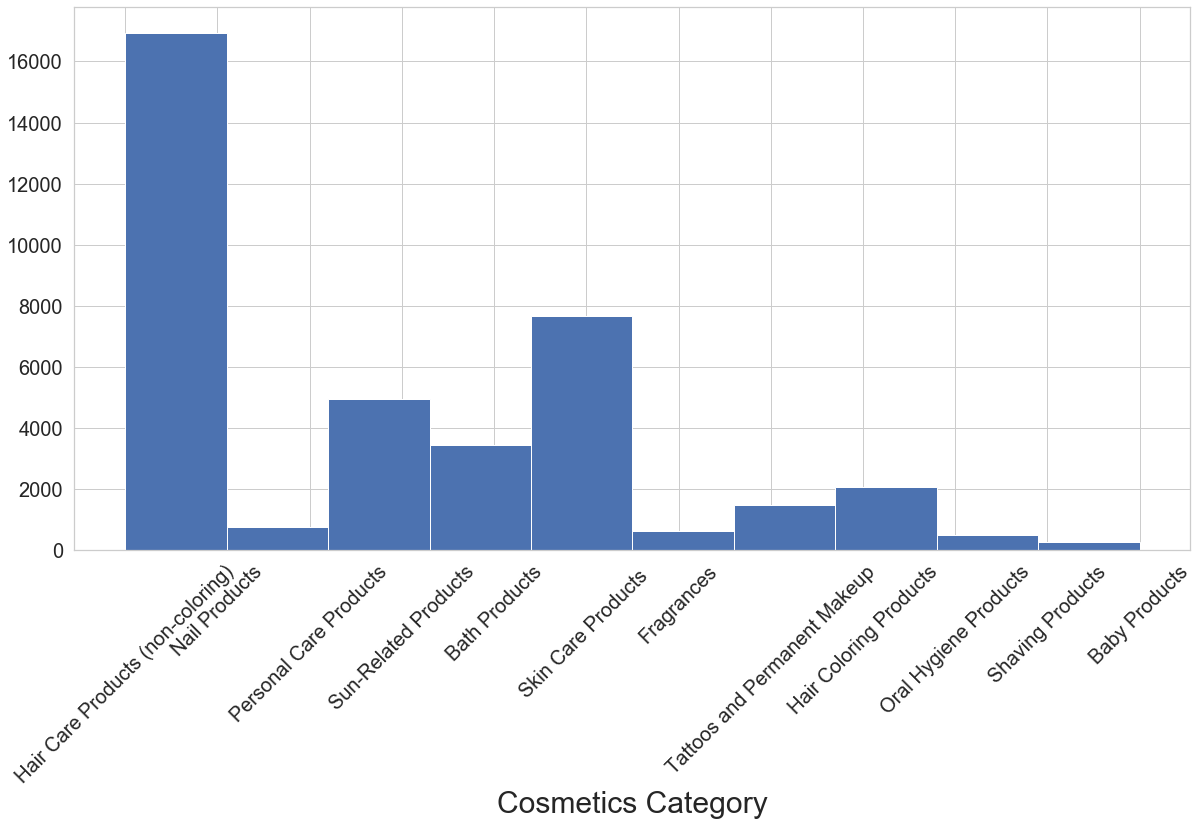

In [45]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(no_makeup_df['PrimaryCategory'])
plt.xticks(rotation='45')
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.set_xlabel('Cosmetics Category', size=30)
plt.show()

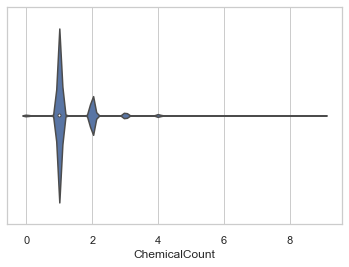

In [19]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=clean_data_df['ChemicalCount'])